In [4]:
import numpy as np 
from io import StringIO
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import re

In [2]:
# Inverting dictionaries to map index -> Diagnosiscode
binary_5digit_mixed_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/binary_5digit_mixed.types')
binary_5digit_mixed_types_inv = {v: k for k, v in binary_5digit_mixed_types.items()}
binary_5digit_female_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/binary_5digit_female.types')
binary_5digit_female_types_inv = {v: k for k, v in binary_5digit_female_types.items()}
binary_5digit_male_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/binary_5digit_male.types')
binary_5digit_male_types_inv = {v: k for k, v in binary_5digit_male_types.items()}
print(len(binary_5digit_female_types))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/binary_5digit_mixed.types'

In [5]:
mixed_dataset = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/binary_5digit_mixed.matrix')
female_dataset = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/binary_5digit_female.matrix')
male_dataset = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/binary_5digit_male.matrix')
mixed_generated = np.load('/Users/nicenoize/Documents/Bachelorarbeit/binary_5digit_mixed_full.npy')
female_generated = np.load('/Users/nicenoize/Documents/Bachelorarbeit/binary_5digit_female_full.npy')
male_generated = np.load('/Users/nicenoize/Documents/Bachelorarbeit/binary_5digit_male_full.npy')

In [6]:
# Shape before
print(mixed_dataset.shape)
print(mixed_generated.shape)
print(female_dataset.shape)
print(female_generated.shape)
print(male_dataset.shape)
print(male_generated.shape)

(46520, 6985)
(46000, 6985)
(20399, 5650)
(20000, 5650)
(26121, 5853)
(26000, 5853)


In [7]:
mixed_dataset = mixed_dataset[520:]
female_dataset = female_dataset[399:]
male_dataset = male_dataset[121:]

In [8]:
# Shape after
print(mixed_dataset.shape)
print(mixed_generated.shape)
print(female_dataset.shape)
print(female_generated.shape)
print(male_dataset.shape)
print(male_generated.shape)

(46000, 6985)
(46000, 6985)
(20000, 5650)
(20000, 5650)
(26000, 5853)
(26000, 5853)


In [ ]:
binary_5digit_mixed_patients = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/BINARY_PATIENTS/binary_5digit_mixed.npy')
binary_5digit_mixed_patients = np.rint(binary_5digit_mixed_patients)
print(binary_5digit_mixed_patients.shape)
#male_generated_patients = np.array_str(male_generated_patients)
#for x in np.nditer(male_generated_patients, op_flags=['readwrite'], flags=['multi_index']):
#        if(x==1): x = males_types[x]
binary_5digit_mixed_patients_icd = np.chararray(binary_5digit_mixed_patients.shape, itemsize=8)            
it = np.nditer(binary_5digit_mixed_patients, flags=['multi_index'])
while not it.finished:
    #print ("%d <%s>" % (it[0], it.multi_index)),
    if(it[0] == 1): binary_5digit_mixed_patients_icd[it.multi_index] = binary_5digit_mixed_types_inv[it.multi_index[1]]
    #print()
    it.iternext()
    
# Save mixed patients to csv
pd.DataFrame(binary_5digit_mixed_patients_icd).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/BINARY_PATIENTS/binary_5digit_mixed.csv")


In [ ]:
binary_5digit_female_patients = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/BINARY_PATIENTS/binary_5digit_female.npy')
binary_5digit_female_patients = np.rint(binary_5digit_female_patients)
print(binary_5digit_female_patients.shape)
#male_generated_patients = np.array_str(male_generated_patients)
#for x in np.nditer(male_generated_patients, op_flags=['readwrite'], flags=['multi_index']):
#        if(x==1): x = males_types[x]
binary_5digit_female_patients_icd = np.chararray(binary_5digit_female_patients.shape, itemsize=8)            
it = np.nditer(binary_5digit_female_patients, flags=['multi_index'])
while not it.finished:
    #print ("%d <%s>" % (it[0], it.multi_index)),
    if(it[0] == 1): binary_5digit_female_patients_icd[it.multi_index] = binary_5digit_female_types_inv[it.multi_index[1]]
    #print()
    it.iternext()
    
# Save female patients to csv
pd.DataFrame(binary_5digit_female_patients_icd).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/BINARY_PATIENTS/binary_5digit_female.csv")


In [ ]:
binary_5digit_male_patients = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/BINARY_PATIENTS/binary_5digit_male.npy')
binary_5digit_male_patients = np.rint(binary_5digit_male_patients)
print(binary_5digit_male_patients.shape)
#male_generated_patients = np.array_str(male_generated_patients)
#for x in np.nditer(male_generated_patients, op_flags=['readwrite'], flags=['multi_index']):
#        if(x==1): x = males_types[x]
binary_5digit_male_patients_icd = np.chararray(binary_5digit_male_patients.shape, itemsize=8)            
it = np.nditer(binary_5digit_male_patients, flags=['multi_index'])
while not it.finished:
    #print ("%d <%s>" % (it[0], it.multi_index)),
    if(it[0] == 1): binary_5digit_male_patients_icd[it.multi_index] = binary_5digit_male_types_inv[it.multi_index[1]]
    #print()
    it.iternext()
    
# Save male patients to csv
pd.DataFrame(binary_5digit_male_patients_icd).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/BINARY_PATIENTS/binary_5digit_male.csv")


In [9]:
# Binary
binary_5digit_mixed = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/BINARY_PATIENTS/binary_5digit_mixed.csv')
binary_5digit_female = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/BINARY_PATIENTS/binary_5digit_female.csv')
binary_5digit_male = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/BINARY_PATIENTS/binary_5digit_male.csv')

In [2]:
binary_5digit_mixed.shape

NameError: name 'binary_5digit_mixed' is not defined

In [3]:
# Invert
#males = males.T
#females = females.T
#mixed = mixed.T

In [ ]:
#for i in range(855):
#    females.rename(columns={ females.columns[i]: "DIAGNOSIS_ICD" }, inplace = True)
#females.rename(columns={females.columns[0]: "DIAGNOSIS_ICD" }, inplace = True)
#males.rename(columns={females.columns[0]: "DIAGNOSIS_ICD" }, inplace = True)

#females.head()

In [10]:
# Binary
binary_5digit_mixed.rename(columns={binary_5digit_mixed.columns[0]: "SUBJECT_ID"}, inplace = True)
binary_5digit_female.rename(columns={binary_5digit_female.columns[0]: "SUBJECT_ID"}, inplace = True)
binary_5digit_male.rename(columns={binary_5digit_male.columns[0]: "SUBJECT_ID"}, inplace = True)

In [11]:
# Binary
binary_5digit_mixed = pd.melt(binary_5digit_mixed, id_vars=["SUBJECT_ID"])
binary_5digit_female = pd.melt(binary_5digit_female, id_vars=["SUBJECT_ID"])
binary_5digit_male = pd.melt(binary_5digit_male, id_vars=["SUBJECT_ID"])

In [5]:
# Find patient by SUBJECT_ID
#print(females_transformed.loc[females_transformed['SUBJECT_ID'] == 3])
print(binary_5digit_female)

           SUBJECT_ID variable value
0                   0        0   b''
1                   1        0   b''
2                   2        0   b''
3                   3        0   b''
4                   4        0   b''
...               ...      ...   ...
112999995       19995     5649   b''
112999996       19996     5649   b''
112999997       19997     5649   b''
112999998       19998     5649   b''
112999999       19999     5649   b''

[113000000 rows x 3 columns]


In [12]:
# Sort rows by SUBJECT ID
binary_5digit_mixed_diagnoses = binary_5digit_mixed.sort_values(by=['SUBJECT_ID'], ascending = True)
binary_5digit_female_diagnoses = binary_5digit_female.sort_values(by=['SUBJECT_ID'], ascending = True)
binary_5digit_male_diagnoses = binary_5digit_male.sort_values(by=['SUBJECT_ID'], ascending = True)


# Drop NaN rows
binary_5digit_mixed_diagnoses = binary_5digit_mixed_diagnoses.dropna()
binary_5digit_female_diagnoses = binary_5digit_female_diagnoses.dropna()
binary_5digit_male_diagnoses = binary_5digit_male_diagnoses.dropna()

print(binary_5digit_female_diagnoses)

KeyboardInterrupt: 

In [ ]:
# Filter mixed patients with 5 digits codes for with ischemic diseases, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
mixed_ischemic_5digits = binary_5digit_mixed_diagnoses[binary_5digit_mixed_diagnoses.value.str.contains("^b'D_4.+", regex=True, na=False)]
mixed_CAD = binary_5digit_mixed_diagnoses[binary_5digit_mixed_diagnoses.value.str.contains("^b'D_414.+", regex=True, na=False)]
mixed_heart_disease_5digits = binary_5digit_mixed_diagnoses[binary_5digit_mixed_diagnoses.value.str.contains("b'D_429", regex=True, na=False)]
mixed_diabetes_5digits = binary_5digit_mixed_diagnoses[binary_5digit_mixed_diagnoses.value.str.contains("^b'D_250", na=False)]
mixed_ischemic_ids_5digits = mixed_ischemic_5digits["SUBJECT_ID"].tolist()
mixed_heart_disease_ids_5digits = mixed_heart_disease_5digits["SUBJECT_ID"].tolist()
mixed_diabetes_ids_5digits = mixed_diabetes_5digits["SUBJECT_ID"].tolist()

In [ ]:
# Filter female patients with 5 digits codes for with ischemic diseases, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
female_ischemic_5digits = binary_5digit_female_diagnoses[binary_5digit_female_diagnoses.value.str.contains("^b'D_4.+", regex=True, na=False)]
female_CAD = binary_5digit_female_diagnoses[binary_5digit_female_diagnoses.value.str.contains("^b'D_414.+", regex=True, na=False)]
female_heart_disease_5digits = binary_5digit_female_diagnoses[binary_5digit_female_diagnoses.value.str.contains("b'D_429", regex=True, na=False)]
female_diabetes_5digits = binary_5digit_female_diagnoses[binary_5digit_female_diagnoses.value.str.contains("^b'D_250", na=False)]
female_ischemic_ids_5digits = female_ischemic_5digits["SUBJECT_ID"].tolist()
female_heart_disease_ids_5digits = female_heart_disease_5digits["SUBJECT_ID"].tolist()
female_diabetes_ids_5digits = female_diabetes_5digits["SUBJECT_ID"].tolist()

In [ ]:
# Filter male patients with 5 digits codes for with ischemic diseases, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
male_ischemic_5digits = binary_5digit_male_diagnoses[binary_5digit_male_diagnoses.value.str.contains("^b'D_4.+", regex=True, na=False)]
male_ischemic_CAD = binary_5digit_male_diagnoses[binary_5digit_male_diagnoses.value.str.contains("^b'D_414.+", regex=True, na=False)]
male_heart_disease_5digits = binary_5digit_male_diagnoses[binary_5digit_male_diagnoses.value.str.contains("b'D_429", regex=True, na=False)]
male_diabetes_5digits = binary_5digit_male_diagnoses[binary_5digit_male_diagnoses.value.str.contains("^b'D_250", na=False)]
male_ischemic_ids_5digits = male_ischemic_5digits["SUBJECT_ID"].tolist()
male_heart_disease_ids_5digits = male_heart_disease_5digits["SUBJECT_ID"].tolist()
male_diabetes_ids_5digits = male_diabetes_5digits["SUBJECT_ID"].tolist()

In [8]:
# get top 10 most ICD9-Codes for mixed patients
n = 11
mixed_5digit_diagnoses_top10 = binary_5digit_mixed_diagnoses['value'].value_counts()[:n]
print(mixed_5digit_diagnoses_top10)

b''            320788559
b'D_401.9'         17062
b'D_414.01'        11478
b'D_427.31'        11351
b'D_428.0'          8840
b'D_272.4'          7901
b'D_250.00'         7359
b'D_599.0'          6786
b'D_V29.0'          6106
b'D_584.9'          5874
b'D_V05.3'          5768
Name: value, dtype: int64


In [ ]:
# get top 10 most ICD9-Codes for female patients
n = 11
female_5digit_diagnoses_top10 = binary_5digit_female_diagnoses['value'].value_counts()[:n]
print(female_5digit_diagnoses_top10)

In [ ]:
# get top 10 most ICD9-Codes for male patients
n = 11
male_5digit_diagnoses_top10 = binary_5digit_male_diagnoses['value'].value_counts()[:n]
print(male_5digit_diagnoses_top10)

In [ ]:
# get top 10 most ICD9-codes for ischemic diseases for mixed patients
n = 10
mixed_5digit_ischemic_top10 = mixed_ischemic_5digits['value'].value_counts()[:n]
print(mixed_5digit_ischemic_top10)

In [ ]:
# get top 10 most ICD9-codes for ischemic diseases for female patients
n = 10
female_5digit_ischemic_top10 = female_ischemic_5digits['value'].value_counts()[:n]
print(female_5digit_ischemic_top10)

In [ ]:
# get top 10 most ICD9-codes for ischemic diseases for male patients
n = 10
male_5digit_ischemic_top10 = male_ischemic_5digits['value'].value_counts()[:n]
print(male_5digit_ischemic_top10)

In [ ]:
# get top 10 most ICD9-codes for diabetic diseases for mixed patients
n = 10
mixed_5digit_diabetic_top10 = mixed_diabetes_5digits['value'].value_counts()[:n]
print(mixed_5digit_diabetic_top10)

In [ ]:
# get top 10 most ICD9-codes for diabetic diseases for female patients
n = 10
female_5digit_diabetic_top10 = female_diabetes_5digits['value'].value_counts()[:n]
print(female_5digit_diabetic_top10)

In [ ]:
# get top 10 most ICD9-codes for diabetic diseases for male patients
n = 10
male_5digit_diabetic_top10 = male_diabetes_5digits['value'].value_counts()[:n]
print(male_5digit_diabetic_top10)

In [ ]:
# Compare top n ICD9-Codes occurences for ischemic diseases
n = 10

graph_df = mixed_ischemic_5digits['value'].value_counts(normalize=True)[:n].rename('MIXED ICD').to_frame()\
            .join(female_ischemic_5digits['value'].value_counts(normalize=True)[:n].rename('FEMALE ICD').to_frame())\
               .join(male_ischemic_5digits['value'].value_counts(normalize=True)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

In [ ]:
# Compare top n ICD9-Codes occurences for diabetic diseases
n = 10

graph_df = mixed_diabetes_5digits['value'].value_counts(normalize=False)[:n].rename('MIXED ICD').to_frame()\
            .join(female_diabetes_5digits['value'].value_counts(normalize=False)[:n].rename('FEMALE ICD').to_frame())\
               .join(male_diabetes_5digits['value'].value_counts(normalize=False)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

In [ ]:
# Get ids of mixed patients with heart disease + any type of diabetes
mixed_heart_and_diabetes = binary_5digit_mixed_diagnoses[binary_5digit_mixed_diagnoses["SUBJECT_ID"].isin(mixed_ischemic_ids_5digits)]
mixed_heart_and_diabetes = mixed_heart_and_diabetes[mixed_heart_and_diabetes ["SUBJECT_ID"].isin(mixed_diabetes_ids_5digits)]
mixed_CAD_diabetes = binary_5digit_mixed_diagnoses[binary_5digit_mixed_diagnoses["SUBJECT_ID"].isin(mixed_CAD)]
mixed_CAD_diabetes["SUBJECT_ID"].nunique() 

In [ ]:
# Get ids of male patients with heart disease + any type of diabetes
males_heart_and_diabetes = binary_5digit_male_diagnoses[binary_5digit_male_diagnoses["SUBJECT_ID"].isin(male_ischemic_ids_5digits)]
males_heart_and_diabetes = males_heart_and_diabetes[males_heart_and_diabetes["SUBJECT_ID"].isin(male_diabetes_ids_5digits)]
males_CAD_diabetes = binary_5digit_male_diagnoses[binary_5digit_male_diagnoses["SUBJECT_ID"].isin(male_CAD)]
males_CAD_diabetes["SUBJECT_ID"].nunique() 

In [ ]:
# Get ids of female patients with heart disease + any type of diabetes
females_heart_and_diabetes = binary_5digit_female_diagnoses[binary_5digit_female_diagnoses["SUBJECT_ID"].isin(female_ischemic_ids_5digits)]
females_heart_and_diabetes = females_heart_and_diabetes[females_heart_and_diabetes ["SUBJECT_ID"].isin(female_diabetes_ids_5digits)]
females_CAD_diabetes = binary_5digit_female_diagnoses[binary_5digit_female_diagnoses["SUBJECT_ID"].isin(female_CAD)]
females_CAD_diabetes["SUBJECT_ID"].nunique() 

In [170]:
# Original data
diagnoses_icd = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/DIAGNOSES_ICD.csv')

In [171]:
diagnoses_icd["ICD9_CODE"].value_counts()

4019     20703
4280     13111
42731    12891
41401    12429
5849      9119
         ...  
6172         1
4542         1
73600        1
38039        1
3300         1
Name: ICD9_CODE, Length: 6985, dtype: int64

In [172]:
print(mixed_diagnoses_icd['value'].value_counts())

NameError: name 'mixed_diagnoses_icd' is not defined

In [ ]:
print(male_diagnoses_icd['value'].value_counts())

In [ ]:
print(female_diagnoses_icd['value'].value_counts())

In [ ]:
mixed_generated_patients = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/BINARY_PATIENTS/binary_5digit_mixed.npy')
female_generated_patients = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/BINARY_PATIENTS/binary_5digit_female.npy')
male_generated_patients = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/BINARY_PATIENTS/binary_5digit_male.npy')
mixed_dataset = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/binary_5digit_mixed.matrix')
female_dataset = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/binary_5digit_female.matrix')
male_dataset = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/binary_5digit_male.matrix')
mixed_full = np.load('/Users/nicenoize/Documents/Bachelorarbeit/binary_5digit_mixed_full.npy')
female_full = np.load('/Users/nicenoize/Documents/Bachelorarbeit/binary_5digit_female_full.npy')
male_full = np.load('/Users/nicenoize/Documents/Bachelorarbeit/binary_5digit_male_full.npy')
print(mixed_full.shape)
#print(mixed_dataset.shape)
print(female_full.shape)
print(female_dataset.shape)
print(male_full.shape)
print(male_dataset.shape)

In [ ]:
male_dataset = np.delete(male_dataset, 119, axis=0)
print(male_dataset.shape)

In [ ]:
test = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/binary_5digit_mixed.matrix')
print(test)

In [ ]:
N = 50
x = mixed_dataset
y = mixed_generated
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,x,'k-') # identity line
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


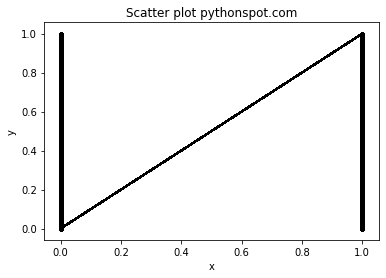

In [135]:
N = 50
x = female_dataset
y = female_generated
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,x,'k-') # identity line
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


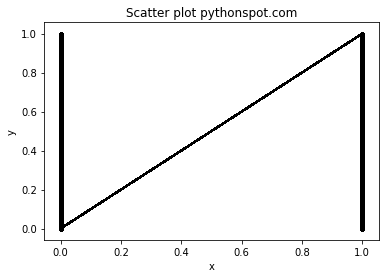

In [136]:
N = 50
x = male_dataset
y = male_generated
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,x,'k-') # identity line
plt.show()

In [ ]:
print(mixed_dataset.shape)
print(mixed_generated.shape)
print(female_dataset.shape)
print(female_generated.shape)
print(male_dataset.shape)
print(male_generated.shape)